In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 - Reading and Understanding the data

In [2]:
data = pd.read_csv(r"C:\Users\arund\Downloads\car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.shape

(112, 2)

In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

##  DATA VISUALIZATION

In [7]:
corr = data.corr(method='pearson')

<Axes: >

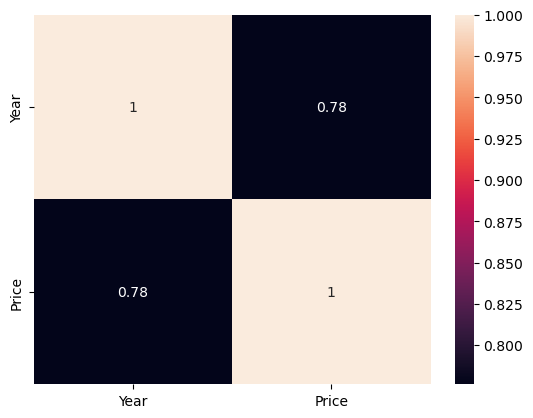

In [8]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Year', ylabel='Price'>

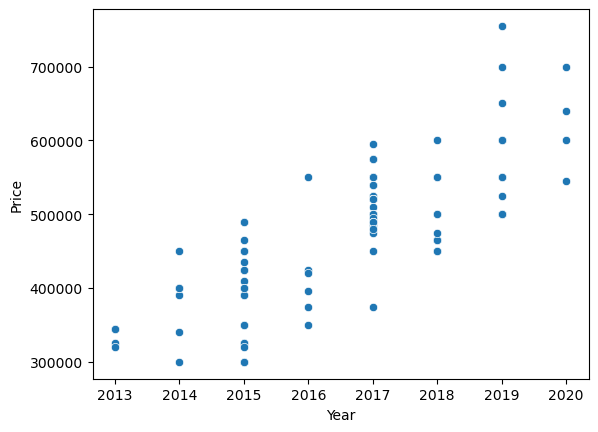

In [9]:
sns.scatterplot(x='Year',y='Price',data=data)

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='Price', ylabel='Count'>

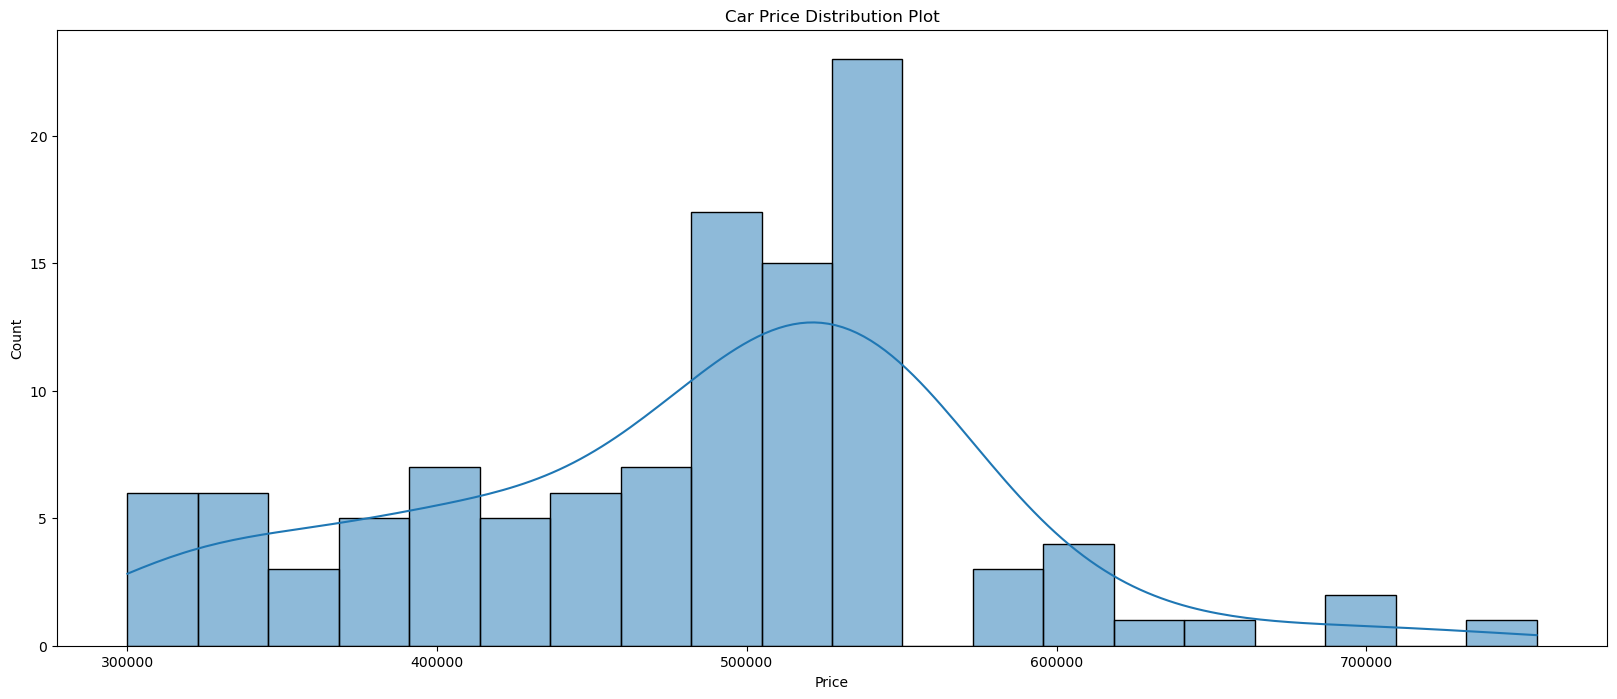

In [10]:
plt.figure(figsize=(20,8))

plt.title('Car Price Distribution Plot')
sns.histplot(x='Price',data=data,kde=True,bins=20)


## Removing Outlier

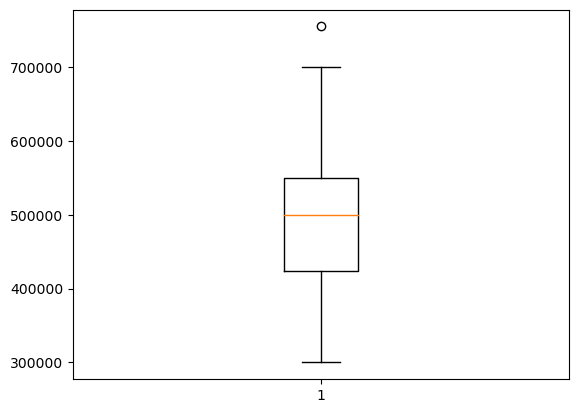

In [11]:
plt.boxplot(data['Price'])
plt.show()

In [12]:
Q1 = np.percentile(data['Price'],25,method='midpoint')
Q2 = np.percentile(data['Price'],50,method='midpoint')
Q3 = np.percentile(data['Price'],75,method='midpoint')

In [13]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  422500.0
Q2 is  500000.0
Q3 is  550000.0


In [14]:
IQR = Q3-Q1
IQR

127500.0

In [15]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  231250.0
upper limit is  741250.0


In [16]:
outlier=[]
for x in data['Price']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[755000]

In [17]:
data = data.drop(1)

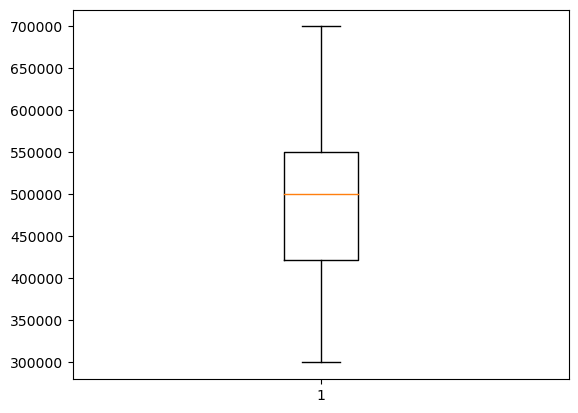

In [18]:
plt.boxplot(data['Price'])
plt.show()

# Splitting The data

In [19]:
y = data['Price']
X = data['Year']

In [20]:
y.shape

(111,)

In [21]:
X.shape

(111,)

In [22]:
y = np.array(y)
y = y.reshape(-1,1)

X = np.array(X)
X = X.reshape(-1,1)

In [23]:
y.shape

(111, 1)

In [24]:
X.shape

(111, 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.20)

In [26]:
print(X_train.shape ,  X_test.shape  , y_train.shape , y_test.shape)

(88, 1) (23, 1) (88, 1) (23, 1)


## Linear Regression

In [27]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [28]:
model = lr.fit(X_train, y_train)

predictions = model.predict(X_test)

In [29]:
predictions

array([[418695.08304033],
       [541198.43288521],
       [418695.08304033],
       [418695.08304033],
       [500363.98293692],
       [418695.08304033],
       [500363.98293692],
       [582032.8828335 ],
       [622867.33278179],
       [500363.98293692],
       [418695.08304033],
       [377860.63309203],
       [541198.43288521],
       [418695.08304033],
       [500363.98293692],
       [500363.98293692],
       [500363.98293692],
       [337026.18314373],
       [459529.53298862],
       [582032.8828335 ],
       [582032.8828335 ],
       [500363.98293692],
       [500363.98293692]])

In [30]:
year = [[2022]]
predicted_price = model.predict(year)

print('Predicted price of a 2022 model second-hand grand i10 :',predicted_price)

Predicted price of a 2022 model second-hand grand i10 : [[704536.23267838]]


In [31]:
from sklearn.metrics import mean_squared_error
print ('Mean squared error is: \n', mean_squared_error(y_test, predictions))

Mean squared error is: 
 2360736941.0488067


In [32]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error is : \n' ,mean_absolute_error(y_test,predictions))

Mean absolute error is : 
 37050.25925992429


In [33]:
from sklearn.metrics import r2_score
print ('R squared value is: \n', r2_score(y_test, predictions))

R squared value is: 
 0.7087665874512326


# Lasso Regression

In [34]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [35]:
y_pred = lasso.predict(X_test)

In [36]:
y_pred

array([418695.14947258, 541198.37919337, 418695.14947258, 418695.14947258,
       500363.96928644, 418695.14947258, 500363.96928644, 582032.7891003 ,
       622867.19900723, 500363.96928644, 418695.14947258, 377860.73956566,
       541198.37919337, 418695.14947258, 500363.96928644, 500363.96928644,
       500363.96928644, 337026.32965873, 459529.55937952, 582032.7891003 ,
       582032.7891003 , 500363.96928644, 500363.96928644])

In [37]:
YEAR = [[2022]]
pred_price = lasso.predict(YEAR)
print('Predicted price of a 2022 model second-hand grand i10 :',pred_price)

Predicted price of a 2022 model second-hand grand i10 : [704536.01882109]


In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2360738206.8636756


In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error :',mae)

Mean absolute error : 37050.27536351136


In [40]:
from sklearn.metrics import r2_score
print ('R squared value is: \n', r2_score(y_test,y_pred))

R squared value is: 
 0.7087664312933915


## Linear regression performs slightly better than Lasso regression.